# Hands On #8

**Chapter 17 – Autoencoders and GANs**

Due date: 2023-04-07

File name convention: For group 42 and memebers Richard Stallman and Linus <br>
Torvalds it would be <br>
"08_Exercise8_group42_Stallman_Torvalds.pdf".

Submission via blackboard (UA).

Feel free to answer free text questions in text cells using markdown and <br>
possibly $\LaTeX{}$ if you want to.

**You don't have to understand every line of code here and it is not intended <br> 
for you to try to understand every line of code.   <br>
Big blocks of code are usually meant to just be clicked through.**

✅

# Setup

In [1]:
# Python ≥3.5 is required
import sys
assert sys.version_info >= (3, 5)

# Scikit-Learn ≥0.20 is required
import sklearn
assert sklearn.__version__ >= "0.20"

# TensorFlow ≥2.0 is required
import tensorflow as tf
from tensorflow import keras
assert tf.__version__ >= "2.0"

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)
tf.random.set_seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt
mpl.rc('axes', labelsize=14)
mpl.rc('xtick', labelsize=12)
mpl.rc('ytick', labelsize=12)

A couple utility functions to plot grayscale 28x28 image:

In [2]:
def plot_image(image):
    plt.imshow(image, cmap="binary")
    plt.axis("off")

# Simple linear Autoencoder (=PCA)

Autoencoders are form of **unsupervised learning** algorithm that attempt to encode <br>
or **transform** an input into some sort of (typically **lower-dimensional**) space <br>
where it has different values and then decode the encoded data back to its <br>
**original state**. A consequence of this approach is that your model learns the <br>
**characteristic behavior** of your data set. Once trained, autoencoders can do <br>
everything from **detect anomalies** and outliers in unseen data to **adding or** even <br>
**removing noise** from new data.

Build 3D dataset:

In [3]:
np.random.seed(4)

def generate_3d_data(m, w1=0.1, w2=0.3, noise=0.1):
    """create some 3d data with noise"""
    angles = np.random.rand(m) * 3 * np.pi / 2 - 0.5
    data = np.empty((m, 3))
    data[:, 0] = np.cos(angles) + np.sin(angles)/2 + noise * np.random.randn(m) / 2
    data[:, 1] = np.sin(angles) * 0.7 + noise * np.random.randn(m) / 2
    data[:, 2] = data[:, 0] * w1 + data[:, 1] * w2 + noise * np.random.randn(m)
    return data

X_train = generate_3d_data(1000)
X_train = X_train - X_train.mean(axis=0, keepdims=0)

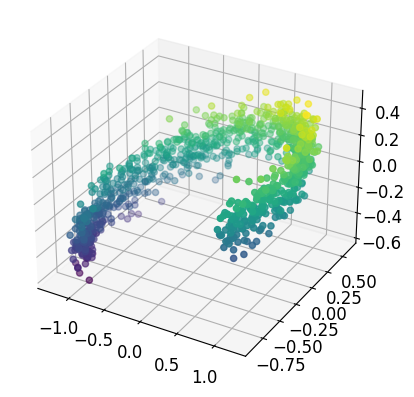

In [4]:
ax = plt.axes(projection="3d")
ax.scatter3D(X_train[:,0], X_train[:,1], X_train[:,2], c=X_train[:,2], cmap="viridis")

Let's try to "compress" the data using an autoencoder.

As a sidenote: Compression is tightly linked to intelligence and there are even arguments
that compression might be all there is to intelligence.   
If you are interested in this topic you can read about the [Hutter prize](http://prize.hutter1.net/hrules.htm).

Now let's build the Autoencoder...

In [5]:
np.random.seed(42)
tf.random.set_seed(42)

# encoder: from 3 to 2 dimensions
encoder = keras.models.Sequential([keras.layers.Dense(2, input_shape=[3])])
# decoder: from 2 to 3 dimensions
decoder = keras.models.Sequential([keras.layers.Dense(3, input_shape=[2])])


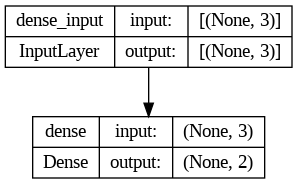

In [6]:
keras.utils.plot_model(encoder, show_shapes=True)

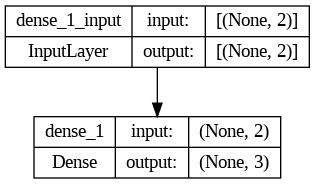

In [7]:
keras.utils.plot_model(decoder, show_shapes=True)

## Task 1: 
If you don't understand autoencoders, we strongly recommend reading the parts <br>
in the book (Chapter 17) first.

a) Build an autoencoder model with the two subcomponents: the encoder and the <br> 
decoder. All you have to do is to "stack" the encoder and decoder, `[encoder,` <br> `decoder]` in a `keras.models.Sequential`✅.  <br> 
b) Compile the model with `mse` loss and SGD optimizer with `lr=1`.✅   <br>
c) Train the model (20 epochs) on the dataset created above. Think about what <br>
`X` and `y` need to be for training the autoencoder. Remember that you want to <br> 
reconstruct the input with an autoencoder.✅<br>
d) Encode the dataset using only the trained encoder. The `encoder` will be <br>
mutated by the autoencoder training, so you can just use it to do this step <br> 
because it is already trained. Call the output `codings` for the plotting code <br> 
below.✅<br>
e) Look at the plot of the encodings and explain the purpose of this <br> encoder. ✅<br>
f) Decode the encodings again and plot them in 3D using the same code as above <br> 
when we plot `X_train`.✅


↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [8]:
autoencoder = keras.models.Sequential([encoder, decoder])
autoencoder.compile(loss="mse", optimizer=keras.optimizers.SGD(learning_rate=1))
history = autoencoder.fit(X_train, X_train, epochs=20)
codings = encoder.predict(X_train)

Epoch 1/20
32/32 [==============================] - 5s 4ms/step - loss: 0.0717
Epoch 2/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0039
Epoch 3/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0033
Epoch 4/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 5/20
32/32 [==============================] - 0s 6ms/step - loss: 0.0033
Epoch 6/20
32/32 [==============================] - 0s 7ms/step - loss: 0.0032
Epoch 7/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 8/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 9/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 10/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 11/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0032
Epoch 12/20
32/32 [==============================] - 0s 4ms/step - loss: 0.0031
Epoch 13/20
32/32 [==============================

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

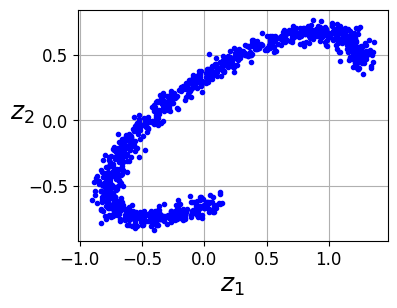

In [9]:
fig = plt.figure(figsize=(4,3))
plt.plot(codings[:,0], codings[:, 1], "b.")
plt.xlabel("$z_1$", fontsize=18)
plt.ylabel("$z_2$", fontsize=18, rotation=0)
plt.grid(True)
plt.show()

ANSWER TO 1e:

The encoder appears to have flattened the 3D input data into some 2D space, while attempting to preserve the relationships between points. This is a good example of dimensionality reduction as it is literally reducing a 3D input into 2D space.


1f Below: plotting the output from the decoder...

32/32 [==============================] - 0s 1ms/step


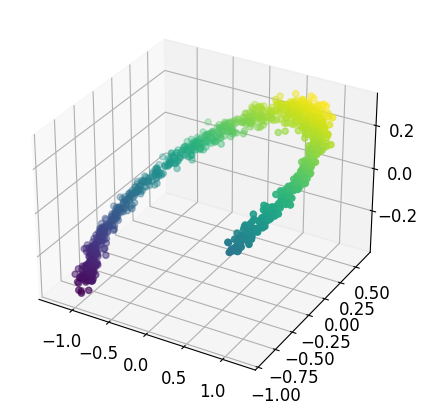

In [10]:
X_decoded = decoder.predict(codings)
fig = plt.figure(figsize=(6, 5))
ax = fig.add_subplot(111, projection="3d")
ax.scatter(X_decoded[:,0], X_decoded[:,1], X_decoded[:,2], c=X_decoded[:,2], cmap="viridis")
plt.show()

# Autoencoder for MNIST
Let's use the MNIST dataset.

In [11]:
(X_train_full, y_train_full), (X_test, y_test) = keras.datasets.fashion_mnist.load_data()
X_train_full = X_train_full.astype(np.float32) / 255
X_test = X_test.astype(np.float32) / 255
X_train, X_valid = X_train_full[:-5000], X_train_full[-5000:]
y_train, y_valid = y_train_full[:-5000], y_train_full[-5000:]

4422102/4422102 [==============================] - 0s 0us/step


Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [12]:
encoder2 = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
])

## Task 2: 
a) Above the code for the encoder is given. Build the corresponding decoder <br> 
(`decoder2`). The last layer of the decoder will have to be `keras.layers.` <br> 
`Reshape([28, 28])`. Just like in task 1, build `autoencoder2` from `encoder2` <br> 
and `decoder`.✅<br>
b) Compile the model using loss: `tf.keras.losses.BinaryCrossentropy(from_logits=True)`, <br>
SGD optimizer with `lr=1.0`, and `accuracy` as metrics.✅<br>
c) Train the model using `X_train` (10 epochs) as both the inputs and the <br> targets (and similarly, use `X_valid` as both the validation inputs and targets).✅ <br>
d) Using the function `show_reconstructions` below, look at the reconstructions <br> 
and comment on them.✅<br>
e) Run these 2 commands:<br>
`X_train[0].shape` and  `encoder2.predict(X_train[0:1])[0].shape` and explain<br> 
their outputs✅.

In [13]:
# def show_reconstructions(model, images=X_valid, n_images=5):
#     reconstructions = model.predict(images[:n_images])
#     fig = plt.figure(figsize=(n_images * 1.5, 3))
#     for image_index in range(n_images):
#         plt.subplot(2, n_images, 1 + image_index)
#         plot_image(images[image_index])
#         plt.subplot(2, n_images, 1 + n_images + image_index)
#         plot_image(reconstructions[image_index])

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [14]:
decoder2 = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
autoencoder2 = keras.models.Sequential([encoder2, decoder2])

In [15]:
autoencoder2.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
                     optimizer=keras.optimizers.SGD(learning_rate=1.0),
                     metrics=['accuracy'])

In [16]:
history = autoencoder2.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.6927 - accuracy: 0.0449 - val_loss: 0.6857 - val_accuracy: 0.0443
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6851 - accuracy: 0.0444 - val_loss: 0.6848 - val_accuracy: 0.0447
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6846 - accuracy: 0.0458 - val_loss: 0.6845 - val_accuracy: 0.0453
Epoch 4/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.6845 - accuracy: 0.0457 - val_loss: 0.6844 - val_accuracy: 0.0449
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6843 - accuracy: 0.0452 - val_loss: 0.6843 - val_accuracy: 0.0463
Epoch 6/10
1719/1719 [==============================] - 6s 3ms/step - loss: 0.6842 - accuracy: 0.0464 - val_loss: 0.6841 - val_accuracy: 0.0464
Epoch 7/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.6841 - accuracy: 0.0472 - val_loss: 0.6840 - val_accuracy:

In [17]:
def show_reconstructions(model, images=X_valid, n_images=5):
    reconstructions = model.predict(images[:n_images])
    fig = plt.figure(figsize=(n_images * 1.5, 3))
    for image_index in range(n_images):
        plt.subplot(2, n_images, 1 + image_index)
        plot_image(images[image_index])
        plt.subplot(2, n_images, 1 + n_images + image_index)
        plot_image(reconstructions[image_index])


1/1 [==============================] - 0s 84ms/step


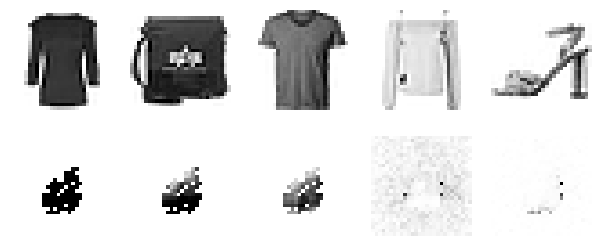

In [18]:
show_reconstructions(autoencoder2)

ANSWER TO 2d:

Comparing the original input images (top row) to their subsequent reconstructions from the autoencoder (bottom row) it is clear that the decoder did not do a good job at getting back the originals. It appears that darkness/brightness level and some basics of shape was preserved, but it is not at all properly reconstructing the images.

In [19]:
X_train[0].shape

(28, 28)

In [20]:
encoder2.predict(X_train[0:1])[0].shape

1/1 [==============================] - 0s 55ms/step


(30,)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

ANSWER TO 2e:

The X_train[0].shape outputs the shape of the first image in the training set which is (28, 28).

The encoder2.predict(X_train[0:1])[0].shape outputs the shape of the encoded representation of the first image in the training set. The input shape of the encoder is (28, 28), so the encoded representation has shape (30,) since it has 30 neurons in the second layer of the encoder.





### "Looking" at the encoding
Here we wil in some sense "look" at the encoding. <br>
We will use TSNE to transform the encoding to 2D and then plot in a 2D plane.<br>

No questions to anwer here, just look at the plots.

In [21]:
from sklearn.manifold import TSNE

X_valid_compressed = encoder2.predict(X_valid)
tsne = TSNE()
X_valid_2D = tsne.fit_transform(X_valid_compressed)
X_valid_2D = (X_valid_2D - X_valid_2D.min()) / (X_valid_2D.max() - X_valid_2D.min())

157/157 [==============================] - 0s 2ms/step


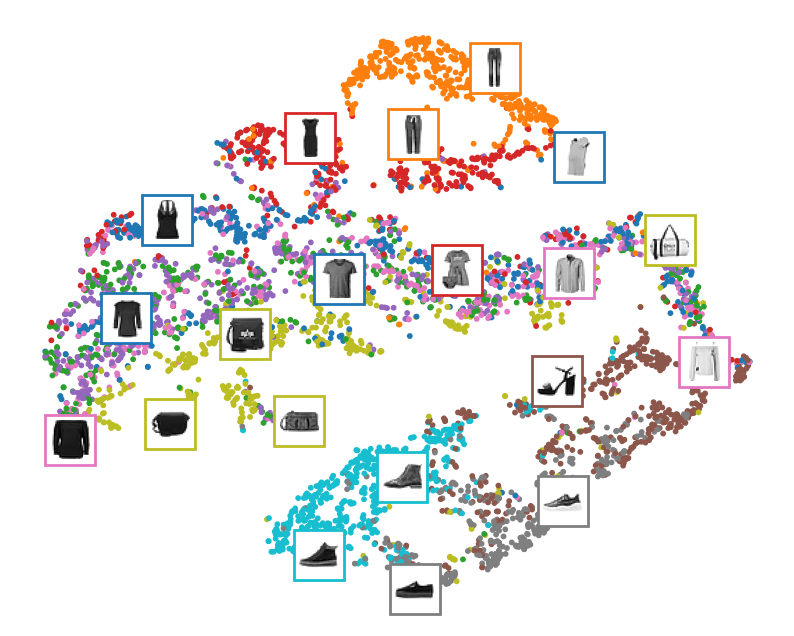

In [22]:
# adapted from https://scikit-learn.org/stable/auto_examples/manifold/plot_lle_digits.html
plt.figure(figsize=(10, 8))
cmap = plt.cm.tab10
plt.scatter(X_valid_2D[:, 0], X_valid_2D[:, 1], c=y_valid, s=10, cmap=cmap)
image_positions = np.array([[1., 1.]])
for index, position in enumerate(X_valid_2D):
    dist = np.sum((position - image_positions) ** 2, axis=1)
    if np.min(dist) > 0.02: # if far enough from other images
        image_positions = np.r_[image_positions, [position]]
        imagebox = mpl.offsetbox.AnnotationBbox(
            mpl.offsetbox.OffsetImage(X_valid[index], cmap="binary"),
            position, bboxprops={"edgecolor": cmap(y_valid[index]), "lw": 2})
        plt.gca().add_artist(imagebox)
plt.axis("off")
plt.show()

## Using Convolutional Layers Instead of Dense Layers

Let's build a stacked Autoencoder with 3 hidden layers and 1 output layer (i.e., 2 stacked Autoencoders).

In [23]:
tf.random.set_seed(42)
np.random.seed(42)

conv_encoder = keras.models.Sequential([
    keras.layers.Reshape([28, 28, 1], input_shape=[28, 28]),
    keras.layers.Conv2D(16, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(32, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2),
    keras.layers.Conv2D(64, kernel_size=3, padding="SAME", activation="selu"),
    keras.layers.MaxPool2D(pool_size=2)
])
conv_decoder = keras.models.Sequential([
    keras.layers.Conv2DTranspose(32, kernel_size=3, strides=2, padding="VALID", 
                                 activation="selu",
                                 input_shape=[3, 3, 64]),
    keras.layers.Conv2DTranspose(16, kernel_size=3, strides=2, padding="SAME", 
                                 activation="selu"),
    keras.layers.Conv2DTranspose(1, kernel_size=3, strides=2, padding="SAME", 
                                 activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])


In [24]:
conv_encoder.summary()
conv_decoder.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 reshape_1 (Reshape)         (None, 28, 28, 1)         0         
                                                                 
 conv2d (Conv2D)             (None, 28, 28, 16)        160       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 14, 14, 16)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 14, 14, 32)        4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 7, 7, 32)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 7, 7, 64)         

In [25]:
pip install visualkeras

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 992.0/992.0 kB 17.1 MB/s eta 0:00:00


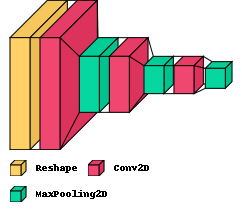

In [26]:
import visualkeras
# depending on your installation you might have to run `pip install visualkeras` (in a separate cell)
visualkeras.layered_view(conv_encoder, legend=True)

Above is a visual representation of the encoder. Alas visualkeras does not <br>
support `Conv2DTranspose` so we cannot plot the decoder here.

### Task 3:
a) Build an autoencoder model with the two subcomponents: the convolutional <br> 
encoder and the convolutional decoder.✅<br>
b) Compile the model using binary cross entropy,  SGD optimizer with lr=1.0 and <br> 
`[accuracy]` as metrics.✅<br>
c) Train the model using X_train (10 epochs) as both the inputs and the targets <br> 
(and similarly, use X_valid as both the validation inputs and targets).✅<br>
d) Is the CNN autoencoder better than dense layer's autoencoders? Why?<br>
e) What is the shape/size of the input and what is the shape/size of the<br>
encoding? Compare to the autoencoder above. (This is similar to task 2e)

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [27]:
encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu"),
    keras.layers.Dense(196, activation="selu"),
    keras.layers.Reshape([14, 14, 1])
])
decoder = keras.models.Sequential([
    keras.layers.Reshape([196], input_shape=[14, 14, 1]),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(28*28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])


conv_autoencoder = keras.models.Sequential([conv_encoder, conv_decoder])

In [28]:
conv_autoencoder.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=["accuracy"])

In [29]:
history = conv_autoencoder.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 19s 6ms/step - loss: 0.2999 - accuracy: 0.1701 - val_loss: 0.2821 - val_accuracy: 0.2012
Epoch 2/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2749 - accuracy: 0.2249 - val_loss: 0.2747 - val_accuracy: 0.2331
Epoch 3/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2705 - accuracy: 0.2496 - val_loss: 0.2690 - val_accuracy: 0.2562
Epoch 4/10
1719/1719 [==============================] - 10s 6ms/step - loss: 0.2680 - accuracy: 0.2660 - val_loss: 0.2683 - val_accuracy: 0.2712
Epoch 5/10
1719/1719 [==============================] - 11s 6ms/step - loss: 0.2663 - accuracy: 0.2772 - val_loss: 0.2668 - val_accuracy: 0.2894
Epoch 6/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2650 - accuracy: 0.2808 - val_loss: 0.2648 - val_accuracy: 0.2865
Epoch 7/10
1719/1719 [==============================] - 9s 5ms/step - loss: 0.2640 - accuracy: 0.2852 - val_loss: 0.2643 - val_accura

d. the CNN autoencoder is much better at reconstructing the original images compared to the dense layer's as seen in the image outputs below. We believe this is because it is actually enforcing the relationship between local pixels, as you would want in an image of a solid object.

In [30]:
X_train[0].shape

(28, 28)

In [31]:
encoder2.predict(X_train[0:1])[0].shape

1/1 [==============================] - 0s 47ms/step


(30,)

e. The original inputs are 28x28 2D images and the latent space outputted by the encoder is a 1D 30 length array. This is the exact same as the inputs and encoder space from the previous autoencoder.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

1/1 [==============================] - 0s 249ms/step


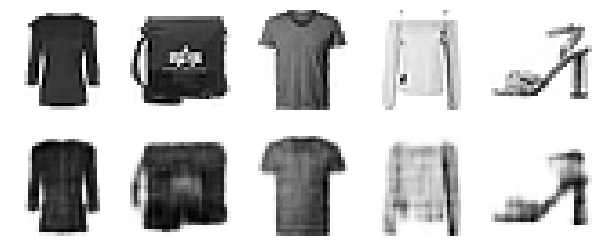

In [32]:
show_reconstructions(conv_autoencoder)
plt.show()

# Denoising Autoencoder

Below we have a similar autoencoder as before, but with an extra <br> `GaussianNoise` layer directly after the input.

In [33]:
tf.random.set_seed(42)
np.random.seed(42)

denoising_encoder = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.GaussianNoise(0.2),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(30, activation="selu")
])
denoising_decoder = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[30]),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])

### Task 4:
a) Build an autoencoder model with the two subcomponents: the encoder and the <br> 
decoder.✅<br>
b) Compile the model using binary cross entropy,  SGD optimizer with lr=1.0 and <br> 
`accuracy` as metrics.✅<br>
c) Train the model using X_train (10 epochs) as both the inputs and the targets <br> 
(and similarly, use X_valid as both the validation inputs and targets).✅<br>
d) Explain why adding Gaussian noise to the input would help the autoencoder to <br> 
learn. ✅  

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

In [34]:
denoising_ae = keras.models.Sequential([denoising_encoder, denoising_decoder])
denoising_ae.compile(loss="binary_crossentropy", optimizer=keras.optimizers.SGD(learning_rate=1.0), metrics=["accuracy"])
history = denoising_ae.fit(X_train, X_train, epochs=10, validation_data=(X_valid, X_valid))

Epoch 1/10
1719/1719 [==============================] - 8s 4ms/step - loss: 0.3474 - accuracy: 0.0772 - val_loss: 0.3179 - val_accuracy: 0.0955
Epoch 2/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.3121 - accuracy: 0.0952 - val_loss: 0.3098 - val_accuracy: 0.0980
Epoch 3/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3055 - accuracy: 0.1022 - val_loss: 0.3023 - val_accuracy: 0.1096
Epoch 4/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.3017 - accuracy: 0.1102 - val_loss: 0.2990 - val_accuracy: 0.1155
Epoch 5/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2986 - accuracy: 0.1181 - val_loss: 0.2962 - val_accuracy: 0.1240
Epoch 6/10
1719/1719 [==============================] - 7s 4ms/step - loss: 0.2963 - accuracy: 0.1246 - val_loss: 0.2946 - val_accuracy: 0.1277
Epoch 7/10
1719/1719 [==============================] - 6s 4ms/step - loss: 0.2946 - accuracy: 0.1296 - val_loss: 0.2928 - val_accuracy:

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 4d) answer:

Adding Gaussian noise to the input can help the autoencoder to learn by making it more robust to noise and distortions in the input data. Essentially it is forcing the autoencoder to learn that small variations in its latent space should not drastically change the overall output that much. It will also help with generalization since the object can essentially "shift" around with this noise and the autoencoder should be able to adapt to these changes and produce similar results.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

1/1 [==============================] - 0s 70ms/step


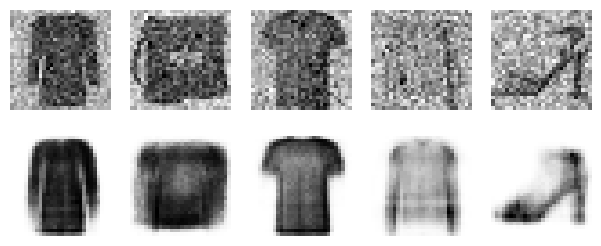

In [35]:
tf.random.set_seed(42)
np.random.seed(42)

noise = keras.layers.GaussianNoise(0.2)
show_reconstructions(denoising_ae, noise(X_valid, training=True))
plt.show()

1/1 [==============================] - 0s 39ms/step


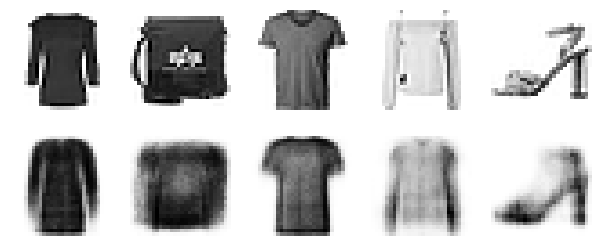

In [36]:
show_reconstructions(denoising_ae, X_valid)   # denoising autoencoder applied to "sharp" images
plt.show()

1/1 [==============================] - 0s 37ms/step


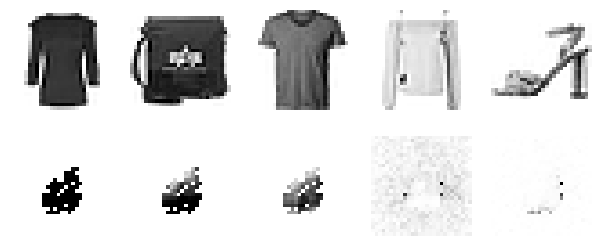

In [37]:
show_reconstructions(autoencoder2, X_valid)   # original autoencoder without Gaussian noise
plt.show()

# Variational Autoencoder

### Task 5:
Below you see the implementation of a variational autoencoder.   

a) Explain how a variational autoencoder works. What are the differences to a<br>
normal autoencoder? <br>
b) Explain how you would "generate" new data with a variational autoencoder.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 5a) answer:

The encoder of a VAE produces a mean coding and a standard deviation after which the actual coding is then sampled randomly from a Gaussian distribution with the mean and standard deviation. then, the decoder reconstructs the original input data normally, and the final output resembles the training instance. the regularization loss is computed using the Kullback-Leibler (KL) divergence between the learned distribution and the assumed Gaussian distribution.  

The key difference between a VAE and a normal autoencoder is that VAE models the distribution of the compressed data by assuming that the compressed data follows a Gaussian distribution and then learn to generate new instances from this gaussian distribution. while a normal autoencoder does not.

VAEs are also easier to train,and the sampling process much faster, and they also perform Bayesian inference.

Task 5b) answer:

I will generate new data by first sampling a compressed representation from the learned distribution of my VAE (by using the mean and variance from the VAE's encoder on the normal distribution), then feed it into the VAE's decoder to generate new data. (The decoder will take the compressed representation and decode it back into the original data space, producing a new sample that is similar to the training data) 

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

In [38]:
K = keras.backend
kl_divergence = keras.losses.kullback_leibler_divergence

class KLDivergenceRegularizer(keras.regularizers.Regularizer):
    def __init__(self, weight, target=0.1):
        self.weight = weight
        self.target = target
    def __call__(self, inputs):
        mean_activities = K.mean(inputs, axis=0)
        return self.weight * (
            kl_divergence(self.target, mean_activities) +
            kl_divergence(1. - self.target, 1. - mean_activities))

In [39]:
class Sampling(keras.layers.Layer):
    def call(self, inputs):
        mean, log_var = inputs
        return K.random_normal(tf.shape(log_var)) * K.exp(log_var / 2) + mean

In [40]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 10

inputs = keras.layers.Input(shape=[28, 28])
z = keras.layers.Flatten()(inputs)
z = keras.layers.Dense(150, activation="selu")(z)
z = keras.layers.Dense(100, activation="selu")(z)
codings_mean = keras.layers.Dense(codings_size)(z)
codings_log_var = keras.layers.Dense(codings_size)(z)
codings = Sampling()([codings_mean, codings_log_var])
variational_encoder = keras.models.Model(
    inputs=[inputs], outputs=[codings_mean, codings_log_var, codings])

decoder_inputs = keras.layers.Input(shape=[codings_size])
x = keras.layers.Dense(100, activation="selu")(decoder_inputs)
x = keras.layers.Dense(150, activation="selu")(x)
x = keras.layers.Dense(28 * 28, activation="sigmoid")(x)
outputs = keras.layers.Reshape([28, 28])(x)
variational_decoder = keras.models.Model(inputs=[decoder_inputs], outputs=[outputs])

_, _, codings = variational_encoder(inputs)
reconstructions = variational_decoder(codings)
variational_ae = keras.models.Model(inputs=[inputs], outputs=[reconstructions])

latent_loss = -0.5 * K.sum(
    1 + codings_log_var - K.exp(codings_log_var) - K.square(codings_mean),
    axis=-1)
variational_ae.add_loss(K.mean(latent_loss) / 784.)

In [41]:
variational_ae.compile(loss="binary_crossentropy", optimizer="rmsprop", metrics=["accuracy"])
history = variational_ae.fit(X_train, X_train, epochs=25, 
                             validation_data=(X_valid, X_valid))

Epoch 1/25
1719/1719 [==============================] - 12s 6ms/step - loss: 0.3662 - accuracy: 0.0802 - val_loss: 0.3423 - val_accuracy: 0.0933
Epoch 2/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3312 - accuracy: 0.0968 - val_loss: 0.3334 - val_accuracy: 0.1022
Epoch 3/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3244 - accuracy: 0.1067 - val_loss: 0.3248 - val_accuracy: 0.1107
Epoch 4/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3212 - accuracy: 0.1150 - val_loss: 0.3232 - val_accuracy: 0.1110
Epoch 5/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3191 - accuracy: 0.1218 - val_loss: 0.3208 - val_accuracy: 0.1152
Epoch 6/25
1719/1719 [==============================] - 10s 6ms/step - loss: 0.3176 - accuracy: 0.1274 - val_loss: 0.3181 - val_accuracy: 0.1294
Epoch 7/25
1719/1719 [==============================] - 9s 5ms/step - loss: 0.3164 - accuracy: 0.1329 - val_loss: 0.3184 - val_accu

1/1 [==============================] - 0s 117ms/step


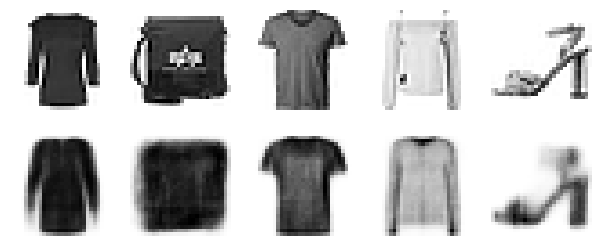

In [42]:
show_reconstructions(variational_ae)
plt.show()

## Generate Fashion Images
Now that we have a variational autoencoder, we can use it to generate fashion <br> 
images.

In [43]:
def plot_multiple_images(images, n_cols=None):
    n_cols = n_cols or len(images)
    n_rows = (len(images) - 1) // n_cols + 1
    if images.shape[-1] == 1:
        images = np.squeeze(images, axis=-1)
    plt.figure(figsize=(n_cols, n_rows))
    for index, image in enumerate(images):
        plt.subplot(n_rows, n_cols, index + 1)
        plt.imshow(image, cmap="binary")
        plt.axis("off")

Let's generate a few random codings, decode them and plot the resulting images:

### Task 6:
a) Take the encoding of the first image `X_train[0:1]` and add multiples (-10 <br> 
to 10) of `np.array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0])`. Decode and plot using <br> 
`plot_multiple_images()`. Hint: The output of `variational_encoder` is  <br>`[codings_mean, codings_log_var, codings]` and you only need the codings, not <br>
the mean and var.✅ <br>
b) Generate few (e.g. 12) random codings using for example [tf.random.normal](https://www.tensorflow.org/api_docs/python/tf/random/normal). <br>
Decode them and plot the resulting images using `plot_multiple_images(images, 4)`✅:

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your code goes below

1/1 [==============================] - 0s 79ms/step


1/1 [==============================] - 0s 66ms/step


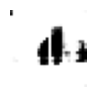

In [44]:
codings = variational_encoder.predict(X_train[0:1])[2]
noises = np.array([-10, -8, -6, -4, -2, 0, 2, 4, 6, 8, 10]).reshape((1, 11))
codings += noises[:, :codings.shape[-1]]
decoded_images = variational_decoder.predict(codings)
plot_multiple_images(decoded_images)


1/1 [==============================] - 0s 17ms/step


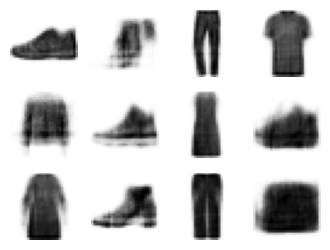

In [45]:
random_codings = tf.random.normal(shape=[12, 10])
decoded_images = variational_decoder.predict(random_codings)
plot_multiple_images(decoded_images, 4)

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your code goes above

Now let's perform semantic interpolation between these images:

# Generative Adversarial Networks

### Task 7:
Look at the GAN implementation below.   
a) Explain what a Generative Adversarial Network does.   
b) Run the code below. During every epoch it plots a few images. Comment on the <br> 
"progress" from epoch 1 to 50. <br>
The training takes a very long time, you can also simply go to [this link](https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb) <br> 
and look at the output under the section "Generative Adversarial Networks".

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 7 a) answer: 

A generative adversarial network is a neural network architecture composed of two parts, the generator and the discriminator. The generator’s main goal is to produce instances like those found in the training set, to trick the discriminator. 

The discriminator then must distinguish a real instances from a generated instance. The discriminator is trained similar to a normal binary classifier, then the generator is trained with the goal of maximizing the discriminator’s error.

GANs are utilized for complex image processing problems such as image editing, super resolution, colorization, etc. GANs can also be utilized in  data augmentation which is handy when training other models. 

Task 7b) answer:

It appears as though the output, through the various epochs, gets more and more detailed. For example, the first few epochs show very pixelated outputs. We can tell that these are decent rough attempts at displaying greyscale clothing images since both the generator and discriminator are not very well trained yet. However, as the epochs continue, the outputs appear more defined in shape and filled in with detail. They seem less pixelated and overall better since both networks are well trained against each other.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

In [46]:
np.random.seed(42)
tf.random.set_seed(42)

codings_size = 30

generator = keras.models.Sequential([
    keras.layers.Dense(100, activation="selu", input_shape=[codings_size]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(28 * 28, activation="sigmoid"),
    keras.layers.Reshape([28, 28])
])
discriminator = keras.models.Sequential([
    keras.layers.Flatten(input_shape=[28, 28]),
    keras.layers.Dense(150, activation="selu"),
    keras.layers.Dense(100, activation="selu"),
    keras.layers.Dense(1, activation="sigmoid")
])


In [47]:
gan = keras.models.Sequential([generator, discriminator])
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [48]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train).shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [49]:
def train_gan(gan, dataset, batch_size, codings_size, n_epochs=50):
    generator, discriminator = gan.layers
    for epoch in range(n_epochs):
        print("Epoch {}/{}".format(epoch + 1, n_epochs))
        for X_batch in dataset:
            # phase 1 - training the discriminator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            generated_images = generator(noise)
            X_fake_and_real = tf.concat([generated_images, X_batch], axis=0)
            y1 = tf.constant([[0.]] * batch_size + [[1.]] * batch_size)
            discriminator.trainable = True
            discriminator.train_on_batch(X_fake_and_real, y1)
            # phase 2 - training the generator
            noise = tf.random.normal(shape=[batch_size, codings_size])
            y2 = tf.constant([[1.]] * batch_size)
            discriminator.trainable = False
            gan.train_on_batch(noise, y2)
        plot_multiple_images(generated_images, 8)
        plt.show()

Epoch 1/1


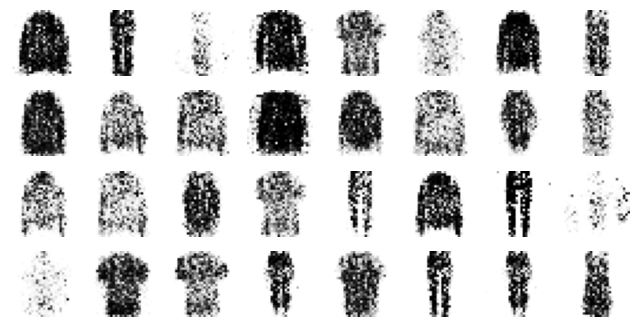

In [ ]:
train_gan(gan, dataset, batch_size, codings_size, n_epochs=1)

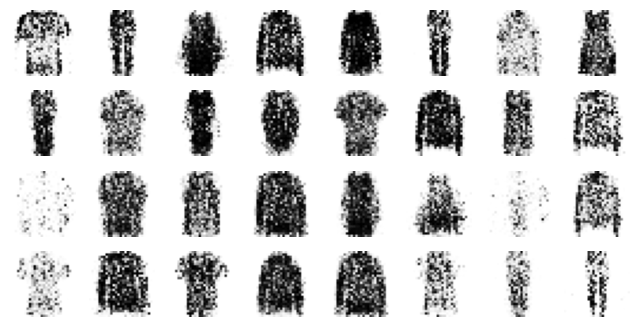

In [ ]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)

Epoch 1/50


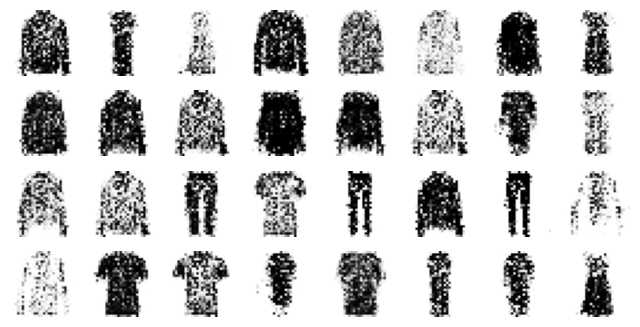

Epoch 2/50


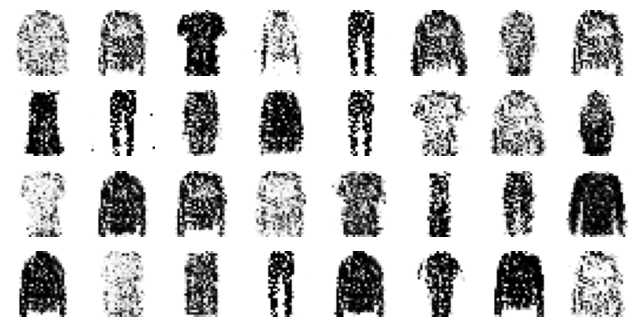

Epoch 3/50


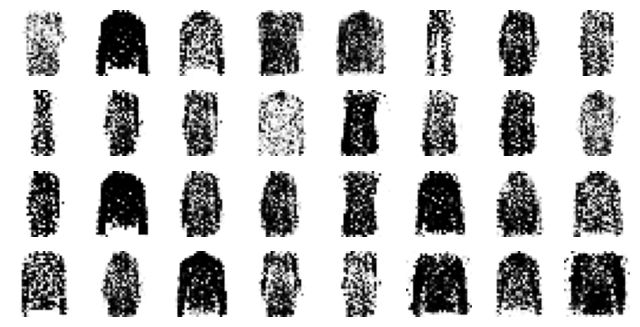

Epoch 4/50


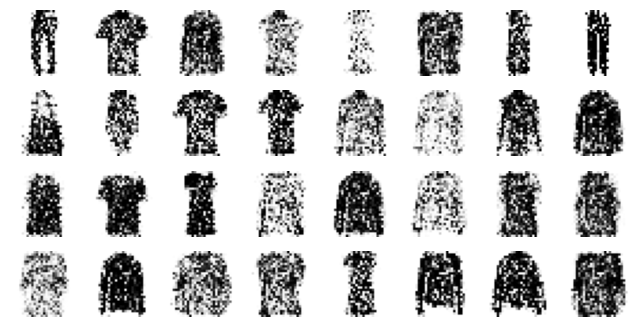

Epoch 5/50


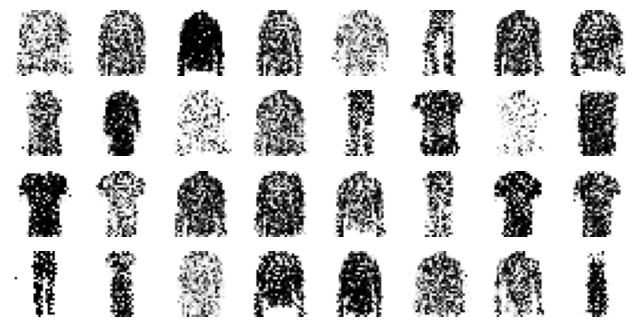

Epoch 6/50


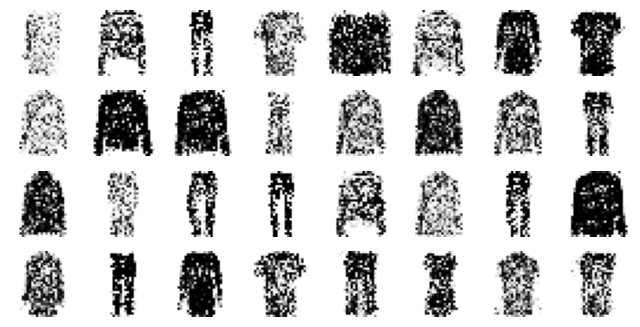

Epoch 7/50


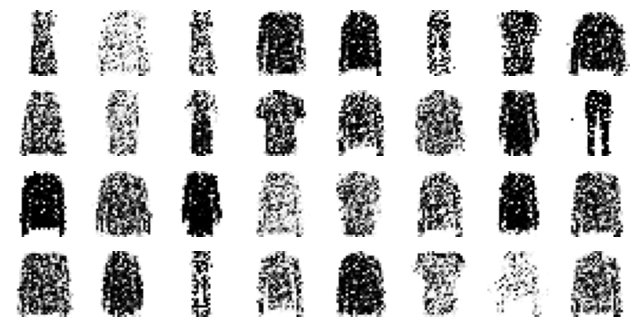

Epoch 8/50


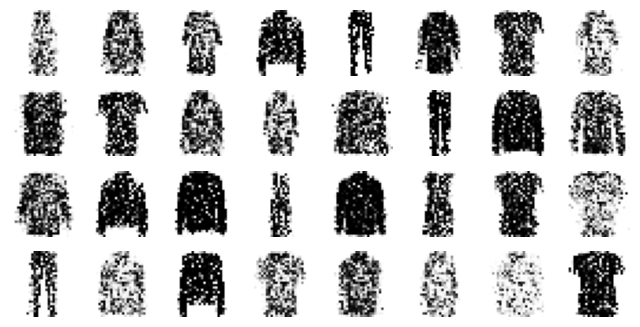

Epoch 9/50


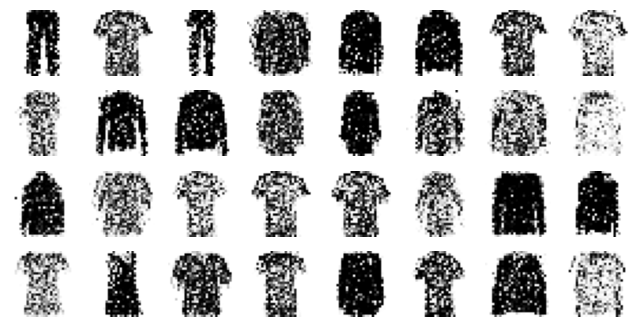

Epoch 10/50


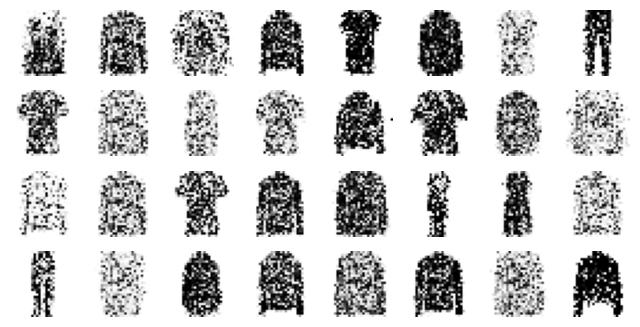

Epoch 11/50


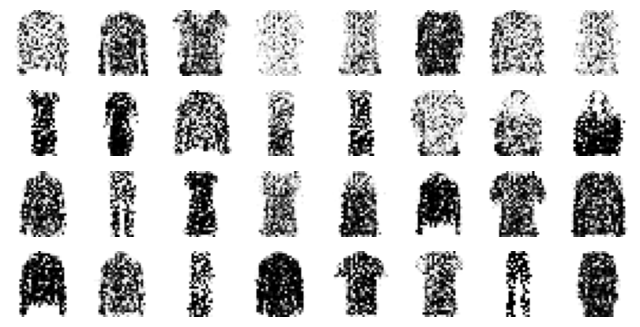

Epoch 12/50


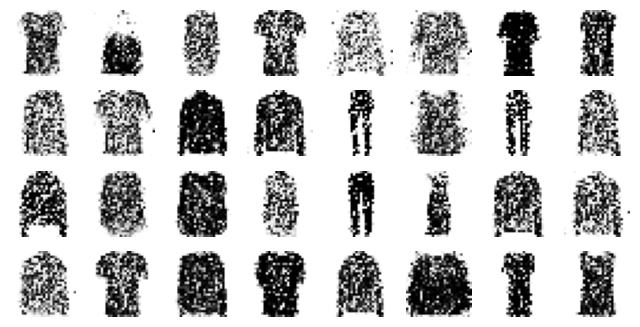

Epoch 13/50


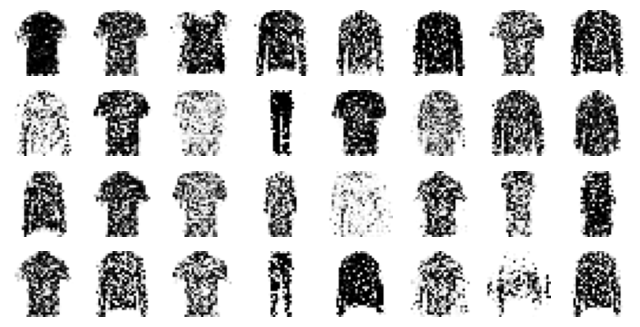

Epoch 14/50


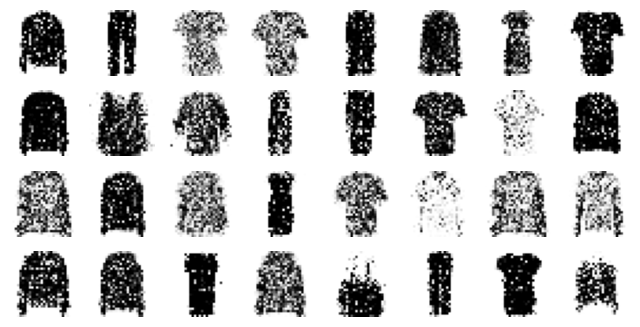

Epoch 15/50


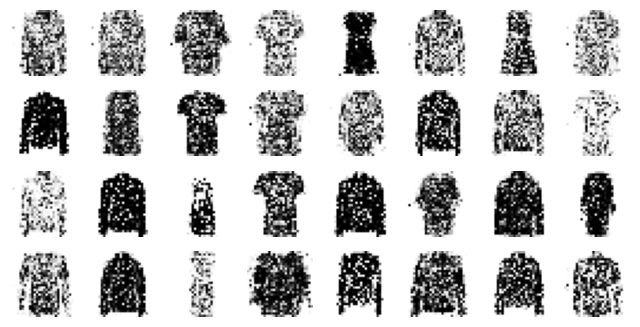

Epoch 16/50


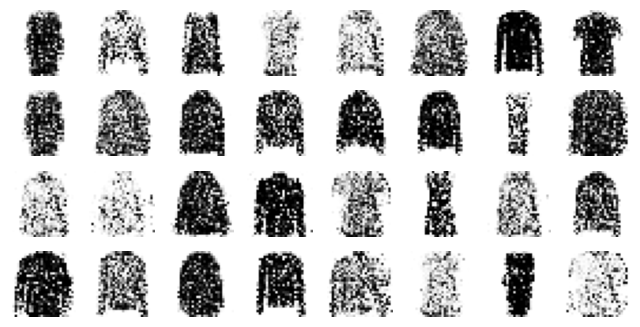

Epoch 17/50


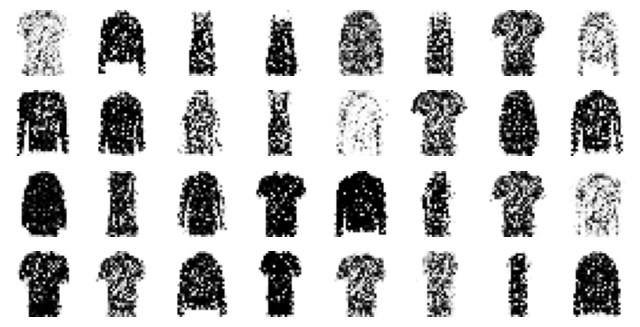

Epoch 18/50


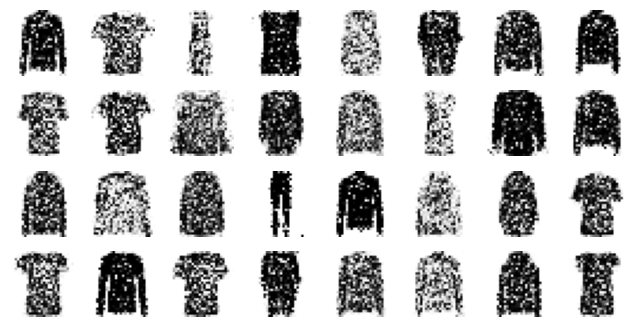

Epoch 19/50


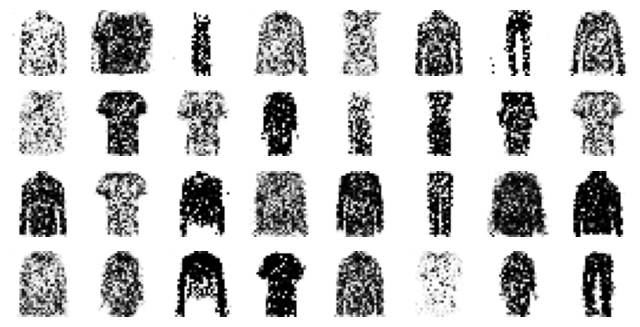

Epoch 20/50


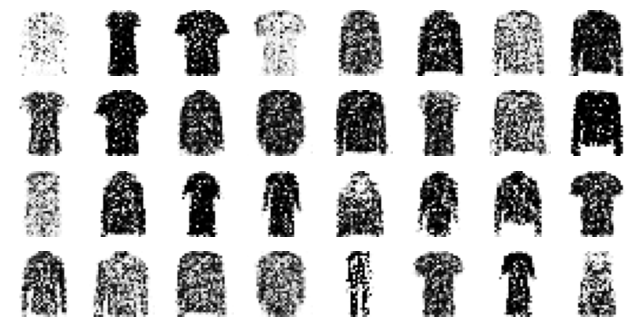

Epoch 21/50


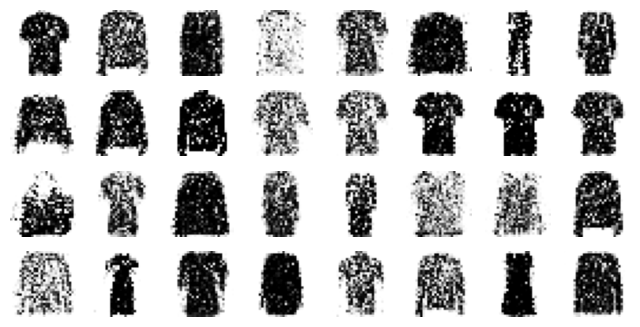

Epoch 22/50


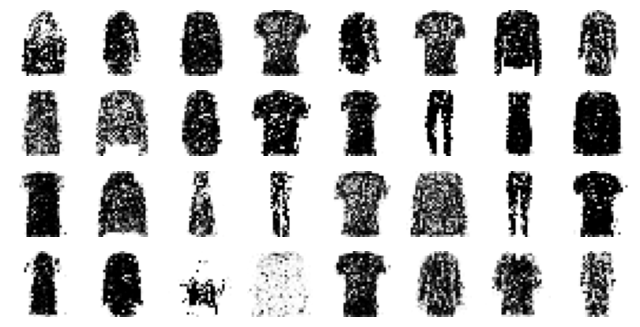

Epoch 23/50


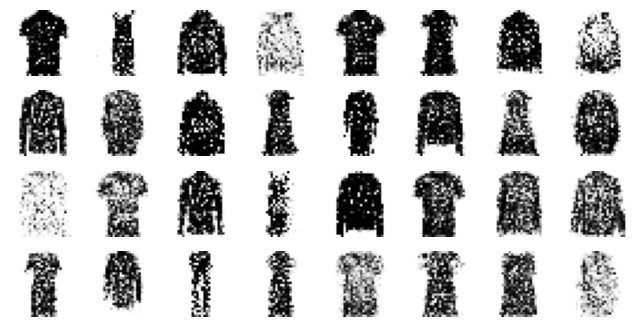

Epoch 24/50


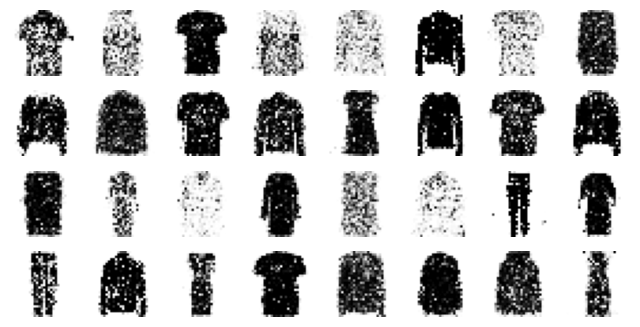

Epoch 25/50


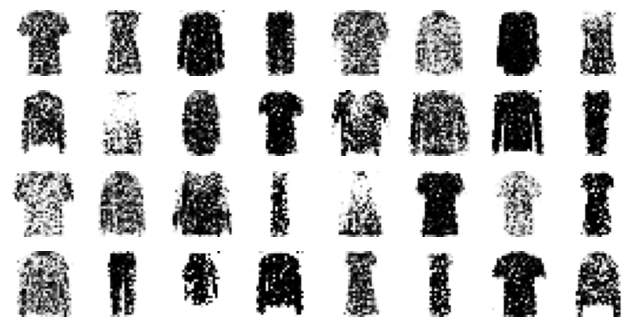

Epoch 26/50


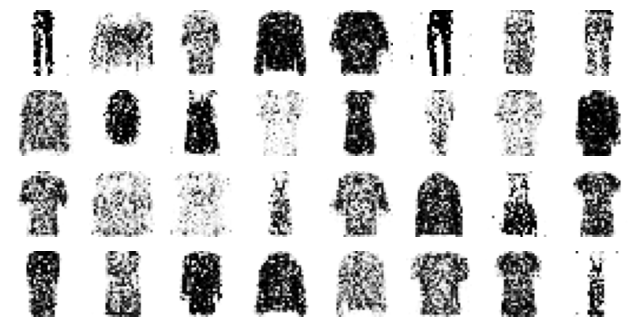

Epoch 27/50


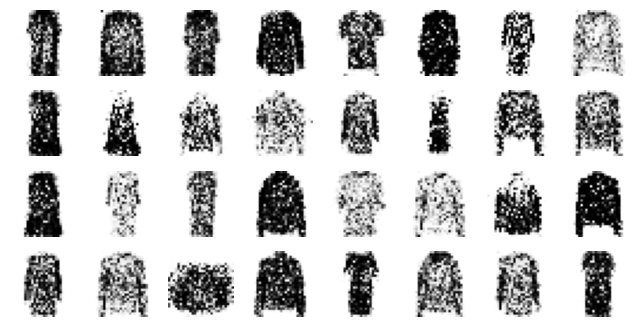

Epoch 28/50


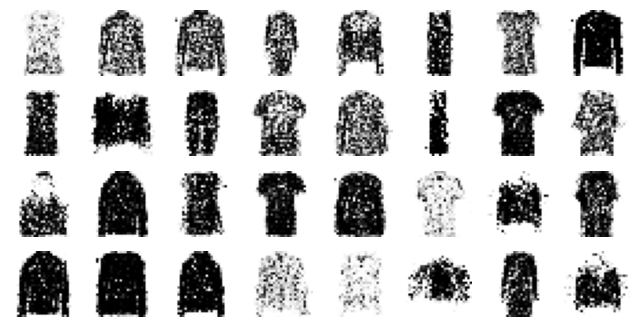

Epoch 29/50


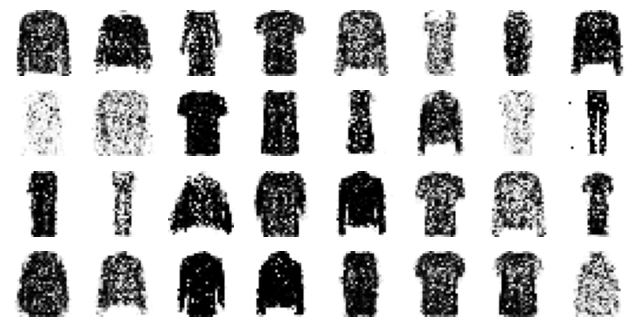

Epoch 30/50


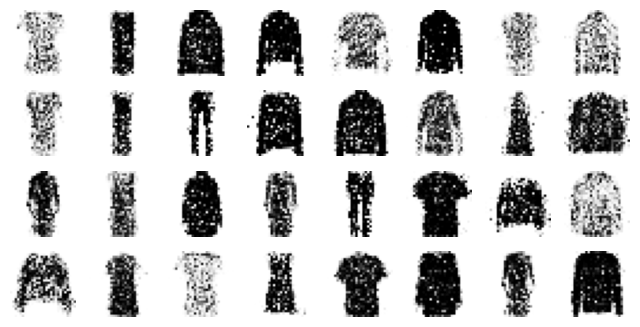

Epoch 31/50


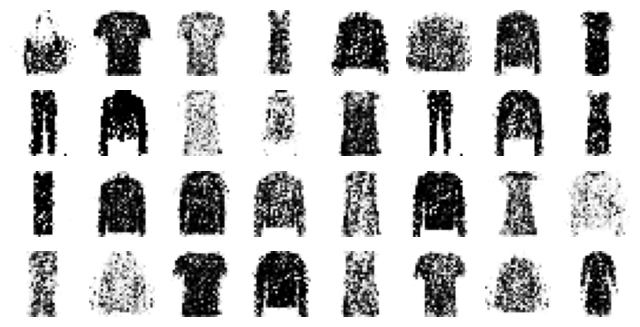

Epoch 32/50


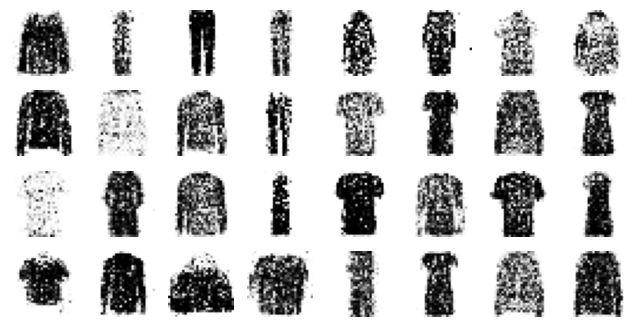

Epoch 33/50


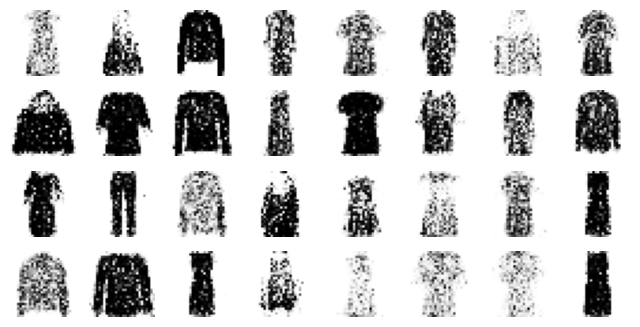

Epoch 34/50


In [ ]:
train_gan(gan, dataset, batch_size, codings_size)

# Deep Convolutional GAN
This is the convolutional variant of the GAN. Again, you can simply look at the <br> 
ouptut from the [link](https://github.com/ageron/handson-ml2/blob/master/17_autoencoders_and_gans.ipynb).

### Task 8:
a) Comment on the training progress of the Deep Convolutional GAN.   
b) Compare the results from the Deep Convolutional GAN with the results from <br> 
task 7.

↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓↓ your answer goes below

Task 8 a) answer:


As the training progresses of the Deep Convolutional GAN, it seems that the model improves significantly and the images produced are very realistic looking. The training seems to improve mostly the shape and detail of the objects they are constructing as you can see an evolution in the straightness of lines and clearness of borders.




Task 8b) answer: 

The results of the images from the Deep convolutional GAN looks more realistic and sharp. i can say these images are of high quality compared to those produced by GAN in task 7. Whereas the previous GAN had more pixelated results, these appear much smoother, most likely due to the nature of convolutional networks applying filters that preserve the local relationships between the pixels.

↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑↑ your answer goes above

In [50]:
tf.random.set_seed(42)
np.random.seed(42)

codings_size = 100

generator = keras.models.Sequential([
    keras.layers.Dense(7 * 7 * 128, input_shape=[codings_size]),
    keras.layers.Reshape([7, 7, 128]),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(64, kernel_size=5, strides=2, padding="SAME",
                                 activation="selu"),
    keras.layers.BatchNormalization(),
    keras.layers.Conv2DTranspose(1, kernel_size=5, strides=2, padding="SAME",
                                 activation="tanh"),
])
discriminator = keras.models.Sequential([
    keras.layers.Conv2D(64, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2),
                        input_shape=[28, 28, 1]),
    keras.layers.Dropout(0.4),
    keras.layers.Conv2D(128, kernel_size=5, strides=2, padding="SAME",
                        activation=keras.layers.LeakyReLU(0.2)),
    keras.layers.Dropout(0.4),
    keras.layers.Flatten(),
    keras.layers.Dense(1, activation="sigmoid")
])
gan = keras.models.Sequential([generator, discriminator])

In [51]:
discriminator.compile(loss="binary_crossentropy", optimizer="rmsprop")
discriminator.trainable = False
gan.compile(loss="binary_crossentropy", optimizer="rmsprop")

In [52]:
X_train_dcgan = X_train.reshape(-1, 28, 28, 1) * 2. - 1. # reshape and rescale

In [53]:
batch_size = 32
dataset = tf.data.Dataset.from_tensor_slices(X_train_dcgan)
dataset = dataset.shuffle(1000)
dataset = dataset.batch(batch_size, drop_remainder=True).prefetch(1)

In [54]:
train_gan(gan, dataset, batch_size, codings_size)

Epoch 1/50


KeyboardInterrupt: ignored

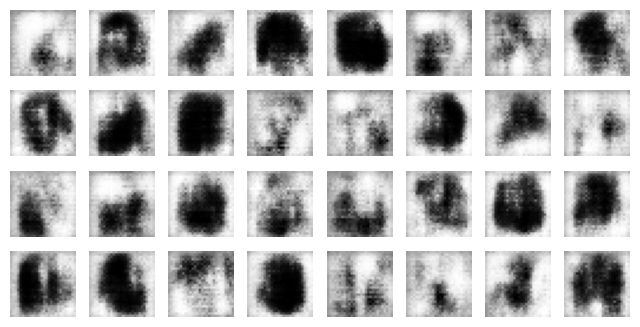

In [55]:
tf.random.set_seed(42)
np.random.seed(42)

noise = tf.random.normal(shape=[batch_size, codings_size])
generated_images = generator(noise)
plot_multiple_images(generated_images, 8)